**Group 63: Trading Desk Analysis of Exotic Options**

Object Oriented Programming Essentials to define a class applicable to each option with traits able to be inherited by each object

European up-and-in barrier call option on Wesfarmers Limited (WES). This option has a strike price of $80.00, an in-barrier level of $100.00, and will expire on 15 Sept 2027, with the valuation commencing on the 16th of May 2025.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.lines import Line2D

**To Price the Barrier call option, the following steps must be undergone:**
1. Simulate many GBM Paths (potential movements of WES stock) - Monte Carlo simulation
2. Check for any paths that have breached the barrier over the duration
3. Calculate Payoffs where the barrier has not been breached (Max of asset price less the strike) 
4. Discount payoffs

WES Up-and-Out Barrier Call Option Price: $14.26


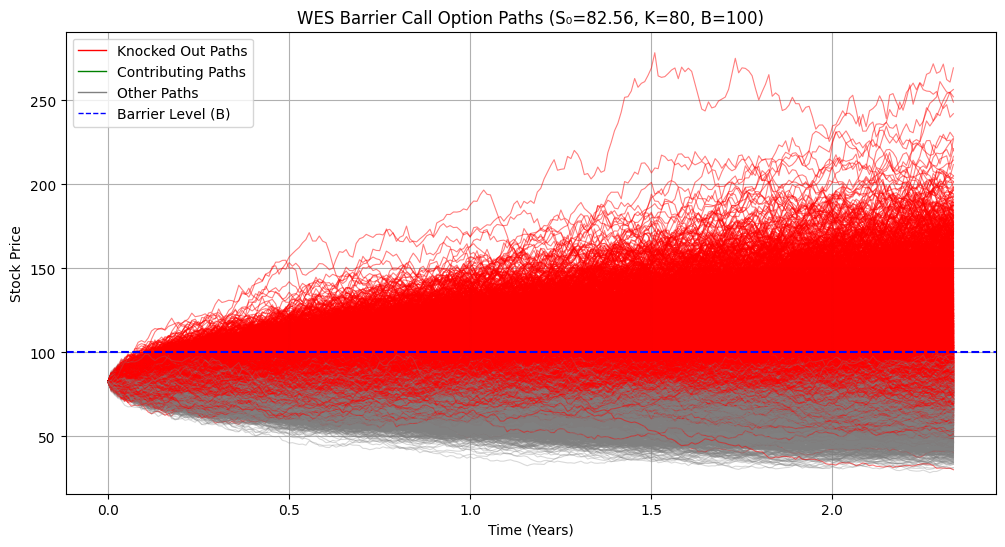

In [6]:
def WES_barrier_call(S0, K, T, r, sigma, B, M=10000, N=252, random_seed=None):
    """
    Price an up-and-out barrier call option using Monte Carlo simulation.

    Parameters:
    S0 (float): Initial stock price
    K (float): Strike price
    T (float): Time to maturity (in years)
    r (float): Risk-free interest rate (annualized)
    sigma (float): Volatility of the underlying asset (annualized)
    B (float): Barrier level (up-and-out)
    M (int): Number of Monte Carlo simulations
    N (int): Number of time steps
    random_seed (int): Seed for random number generator

    Returns:
    float: Estimated price of the up-and-out barrier call option
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    dt = T / N  # Time step
    discount_factor = np.exp(-r * T)  # Discount factor for present value

    # Simulate M paths of GBM
    S = np.zeros((N + 1, M))
    S[0] = S0
    for t in range(1, N + 1):
        Z = np.random.normal(0, 1, M)  # Standard normal random variables
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    # Check if the barrier is breached
    breached = np.any(S > B, axis=0)

    # Calculate payoffs for paths that do breach the barrier (up-and-in)
    payoffs = np.where(breached, np.maximum(S[-1] - K, 0), 0)

    # Calculate the option price
    option_price = discount_factor * np.mean(payoffs)
    return option_price

# Example usage
S0 = 82.56    # Closing stock price on the 16th May 
K = 80     # Strike price
T = 2.3342       # Time to maturity (16/05/25 - 15/09/27 in years)
r = 0.041    # Risk-free rate (cash rate on the 16th May)
sigma = 0.2 # Volatility
B = 100     # Barrier level
M = 10000   # Number of Monte Carlo simulations

barrier_call_price = WES_barrier_call(S0, K, T, r, sigma, B, M, random_seed=42)
print(f"WES Up-and-Out Barrier Call Option Price: ${barrier_call_price:.2f}")

#Graphing the option
def visualize_WES_barrier_call(S0, K, T, r, sigma, B, M=100, N=252, random_seed=None):
    """
    Visualize the paths used to price an up-and-out barrier call option.

    Parameters:
    S0 (float): Initial stock price
    K (float): Strike price
    T (float): Time to maturity (in years)
    r (float): Risk-free interest rate (annualized)
    sigma (float): Volatility of the underlying asset (annualized)
    B (float): Barrier level (up-and-out)
    M (int): Number of Monte Carlo simulations
    N (int): Number of time steps
    random_seed (int): Seed for random number generator
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    dt = T / N  # Time step
    t = np.linspace(0, T, N + 1)  # Time points

    # Simulate M paths of GBM
    S = np.zeros((N + 1, M))
    S[0] = S0
    for i in range(1, N + 1):
        Z = np.random.normal(0, 1, M)  # Standard normal random variables
        S[i] = S[i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    # Determine which paths are knocked out
    breached = np.any(S > B, axis=0)

    # Determine which paths contribute to the option value
    in_the_money = (S[-1] > K) & breached

    # Plot the paths
    plt.figure(figsize=(12, 6))
    for j in range(M):
        if breached[j]:
            plt.plot(t, S[:, j], color='red', alpha=0.5, linewidth=0.8)  # Knocked out paths
        elif in_the_money[j]:
            plt.plot(t, S[:, j], color='green', alpha=0.7, linewidth=1.0)  # Contributing paths
        else:
            plt.plot(t, S[:, j], color='grey', alpha=0.3, linewidth=0.8)  # Other paths

    # Plot the barrier level
    plt.axhline(y=B, color='blue', linestyle='--', linewidth=1.5, label='Barrier Level (B)')

    # Create a custom legend
    legend_elements = [
        Line2D([0], [0], color='red', lw=1, label='Knocked Out Paths'),
        Line2D([0], [0], color='green', lw=1, label='Contributing Paths'),
        Line2D([0], [0], color='grey', lw=1, label='Other Paths'),
        Line2D([0], [0], color='blue', lw=1, linestyle='--', label='Barrier Level (B)')
    ]
    plt.legend(handles=legend_elements, loc="upper left")

    # Add labels and legend
    plt.title(f"WES Barrier Call Option Paths (S₀={S0}, K={K}, B={B})")
    plt.xlabel("Time (Years)")
    plt.ylabel("Stock Price")
    plt.grid(True)
    plt.show()

# Example usage
S0 = 82.56    # Closing stock price on the 16th May 
K = 80     # Strike price
T = 2.3342   # Time to maturity (16/05/25 - 15/09/27 in years)
r = 0.041    # Risk-free rate (cash rate on the 16th May)
sigma = 0.2 # Volatility
B = 100     # Barrier level
M = 10000   # Number of Monte Carlo simulations

visualize_WES_barrier_call(S0, K, T, r, sigma, B, M, random_seed=42)